The data set is comprised of 2,381 observations of 1 response/dependent variable (which indicates whether or not a mortgage application was denied) and 12 explanatory/independent variables.We are going to try to predict which variables have the biggest impact on the fact that a mortgage is denied or not in order  to use the output of the model to identify potential instances of discrimination in the lending practices of the banks for which it is tasked with regulating.

In [333]:
import pandas as pd

In [334]:
#load the data 
df=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/m7DATA/master/M7_Data.csv')
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


A dataframe containing :

dir:debt payments to total income ratio

hir:housing expenses to income ratio

lvr:ratio of size of loan to assessed value of property

ccs:consumer credit score from 1 to 6 (a low value being a good score)

mcs:mortgage credit score from 1 to 4 (a low value being a good score)

pbcr:public bad credit record ?

dmi:denied mortgage insurance ?

self:self employed ?

single:is the applicant single ?

uria:1989 Massachusetts unemployment rate in the applicant's industry

condominium:is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

black:is the applicant black ?

deny:mortgage application denied ?

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
Unnamed: 0     2381 non-null int64
dir            2381 non-null float64
hir            2381 non-null float64
lvr            2381 non-null float64
ccs            2381 non-null float64
mcs            2381 non-null float64
pbcr           2380 non-null object
dmi            2381 non-null object
self           2380 non-null object
single         2381 non-null object
uria           2381 non-null float64
comdominiom    2381 non-null int64
black          2381 non-null object
deny           2381 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 260.5+ KB


In [336]:
#check if there is null values 
df.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [337]:
#proportion of the missing value in the dataframe 
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Unnamed: 0     0.000000
dir            0.000000
hir            0.000000
lvr            0.000000
ccs            0.000000
mcs            0.000000
pbcr           0.041999
dmi            0.000000
self           0.041999
single         0.000000
uria           0.000000
comdominiom    0.000000
black          0.000000
deny           0.000000
dtype: float64

In [338]:
#drop Unnamed: 0 column since it is not necessary 
df.drop(columns=['Unnamed: 0'],inplace=True)

In [339]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [340]:
#get summary statistics for each numerical variable
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


# EDA

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a13da90>,
      dtype=object)

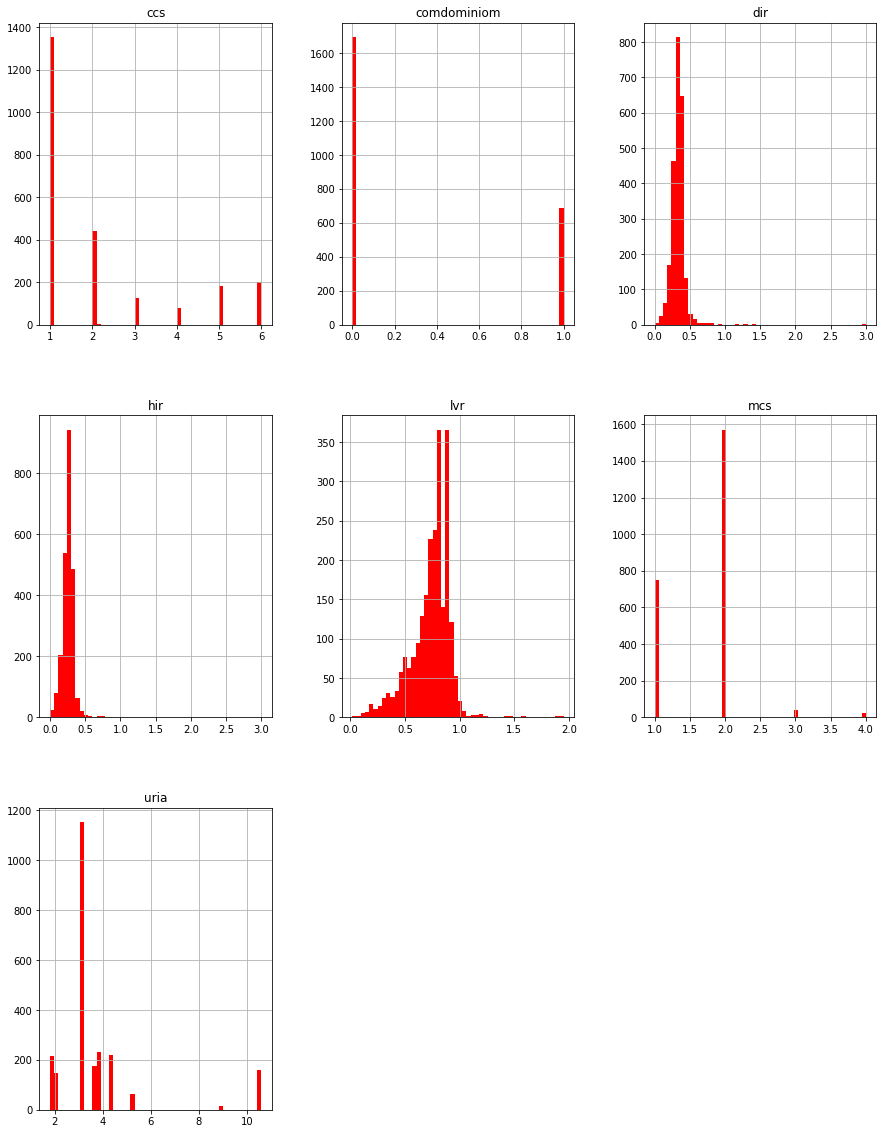

In [342]:
#Distribution of all the variables of the DataFrame
df.hist(figsize=(15,20),bins=50,color='red')



from these histograms we can see that all the numerical variables are distributed into positive number (there is no incoherent negative values), we can see that lvr is left skewed, but also that condominium  mostly have a frequency of  1 among other things.

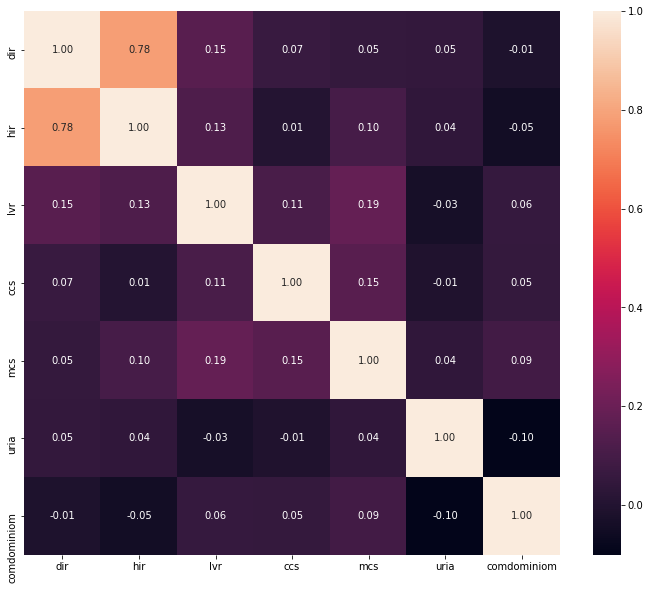

In [343]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

From the corr matrix we can see that most of the variable are not highly correlated, except hir and dir that with a correlation of 0.78 have a high positive correlation.

The following bar plots are here to understand the frequency of deny for each categorical variable.

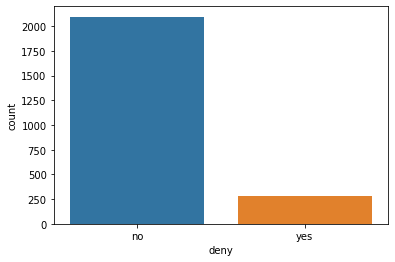

In [344]:
#deny bar plot 
sns.countplot(data = df, x = 'deny')

 We can see that most of the mortgage are not deny

Text(0, 0.5, 'Frequency')

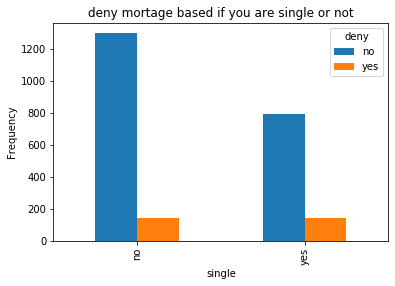

In [345]:
# barplot of single  grouped by deny (Yes or NO)
pd.crosstab(df.single, df.deny).plot(kind='bar')
plt.title('deny mortgage  based if you are single or not')
plt.xlabel('single')
plt.ylabel('Frequency')

From that we can see that even if there is more no deny mortgage for people that are not single, the frequency of deny mortgage is similar for people that are single and those who are not.

Text(0, 0.5, 'Frequency')

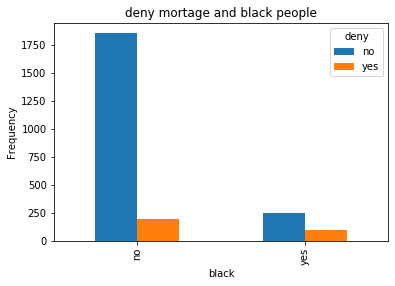

In [346]:
# barplot of black people  grouped by deny (Yes or NO)
pd.crosstab(df.black, df.deny).plot(kind='bar')
plt.title('deny mortgage  and black people')
plt.xlabel('black')
plt.ylabel('Frequency')

We can see that there is a lot more bless people that are asking for mortgage based on the number of mortgage deny and accepted that are much bigger for people that are not black.

Text(0, 0.5, 'Frequency')

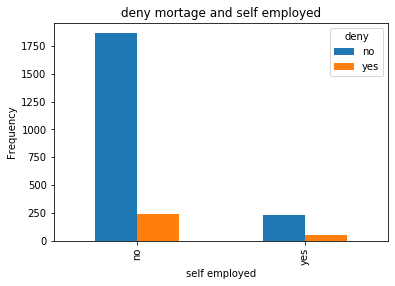

In [347]:
## barplot of self employed   grouped by deny (Yes or NO)
pd.crosstab(df.self, df.deny).plot(kind='bar')
plt.title('deny mortgage  and self employed')
plt.xlabel('self employed')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

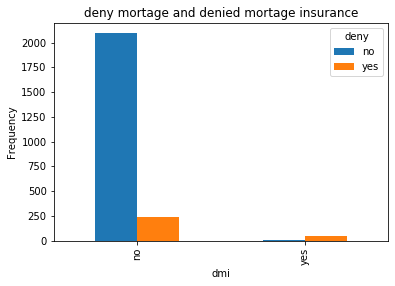

In [348]:
## barplot of dmi  grouped by deny (Yes or NO)
plt.title('deny mortgage e and denied mortage insurance')
plt.xlabel('dmi')
plt.ylabel('Frequency')

We can see that most of the time  people who have mortgage assurance will not see their mortgage to be denied 

Text(0, 0.5, 'Frequency')

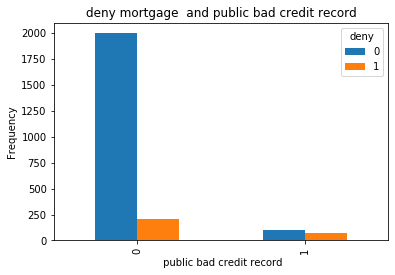

In [385]:
## barplot of pcbr grouped by deny (Yes or NO)
pd.crosstab(df.pbcr, df.deny).plot(kind='bar')
plt.title('deny mortgage  and public bad credit record')
plt.xlabel(' public bad credit record')
plt.ylabel('Frequency')

# Data preparation 

In [351]:
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [352]:
#remove missing value
#the proportion of missing value is very small, less than 1%, thus all the missing values are going to be replace by their mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [353]:
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [354]:
#i have decided to create a new column that will be the mean of ccs and mcs
df['credit_score']=(df['ccs']+df['mcs'])/2

In [355]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny,credit_score
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no,3.5
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no,2.0
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no,1.5
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no,1.5
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no,1.0


In [356]:
len(df['lvr'].unique())

1538

In [357]:
#cut the number at 2 points after the coma 
df['lvr']=round(df['lvr'],2)

In [358]:
df['dir']=round(df['dir'],2)

In [359]:
df['hir']=round(df['hir'],2)

In [360]:
len(df['lvr'].unique())

111

As we can see after rounding the numbers, the number of unique values changes and is much smaller

In [361]:
#for all the categorical values change yes as 1 and no as 0
dummy={'yes':1,'no':0}
df['pbcr']=df['pbcr'].apply(lambda x:dummy[x])
df['dmi']=df['dmi'].apply(lambda x:dummy[x])
df['self']=df['self'].apply(lambda x:dummy[x])
df['single']=df['single'].apply(lambda x:dummy[x])
df['black']=df['black'].apply(lambda x:dummy[x])
df['deny']=df['deny'].apply(lambda x:dummy[x])


In [362]:
#check that the previous code worked 
df['pbcr']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2351    0
2352    0
2353    0
2354    0
2355    1
2356    0
2357    0
2358    0
2359    1
2360    0
2361    0
2362    0
2363    0
2364    0
2365    0
2366    0
2367    0
2368    0
2369    0
2370    0
2371    0
2372    0
2373    0
2374    0
2375    0
2376    0
2377    0
2378    1
2379    0
2380    0
Name: pbcr, Length: 2381, dtype: int64

# feature selection and dimensionality reduction 

In [363]:
df[['dir','hir','deny']].groupby('deny').corr()

dir       hir
deny                        
0    dir  1.000000  0.634701
     hir  0.634701  1.000000
1    dir  1.000000  0.913728
     hir  0.913728  1.000000

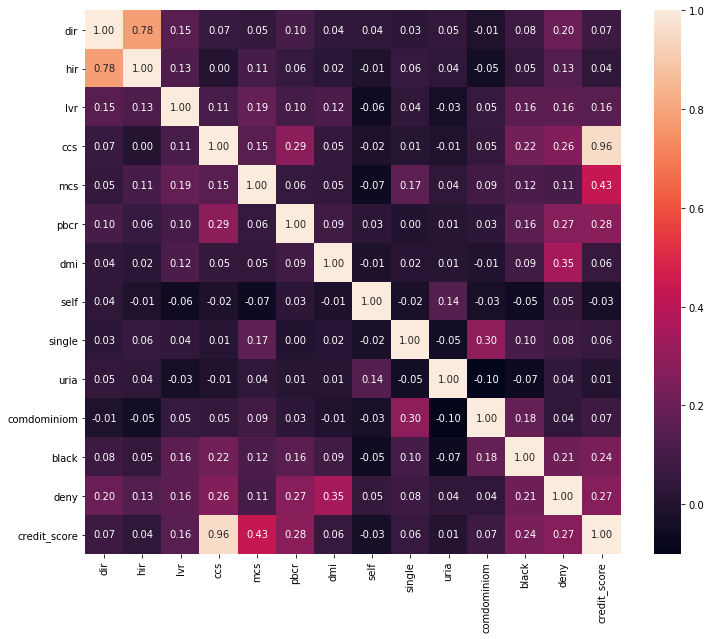

In [386]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

Looking at the results of the correlation matrix and the calculation of the correlation of hir dir with deny , we can see that hir and dir are highly correlated between them, but also with deny.
Thus, when doing regression model we are not going to use these 2 colums at the same time 

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('dir', 'pbcr', 'dmi', 'self', 'black', 'credit_score')

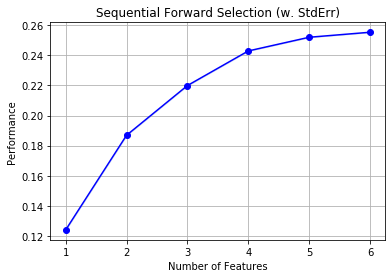

In [364]:
# to  go deeper into  which feature to use we apply forward selection 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
           k_features=6,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
X = df.drop(["deny"],1)
y = df['deny']
sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
sfs.k_feature_names_

# Logistic regression 

In [365]:
#Train the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)


In [366]:
#first logistic regression 
#for model 1 we are going to use the features that the forward selection has selected 
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()
model1.fit(X_train[['dir', 'pbcr', 'self','dmi', 'black', 'credit_score']],y_train)

LogisticRegression()

In [367]:
y_prediction=model1.predict(X_test[['dir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']])
y_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [403]:
#for model 2 we are going to take the same feature as model 1 except that we are going to replace dir with hir since as we hae decided before we are   not going to use them for the same model due to their correlation  
from sklearn.linear_model import LogisticRegression

model2=LogisticRegression()
model2.fit(X_train[['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']],y_train)

LogisticRegression()

In [369]:
y_prediction2=model2.predict(X_test[['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']])
y_prediction2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [370]:
from sklearn.metrics import classification_report
classification_report(y_test,y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.90       627\n           1       0.30      0.27      0.28        88\n\n    accuracy                           0.83       715\n   macro avg       0.60      0.59      0.59       715\nweighted avg       0.82      0.83      0.83       715\n'

In [404]:
#in the 2 previous model we used the credit score variable, variable that we have created before and that is the mean of mcs and ccs, thus this time we are going to use the 2 original variables
from sklearn.linear_model import LogisticRegression

model3=LogisticRegression()
model3.fit(X_train[['pbcr', 'dmi', 'self', 'black', 'mcs','ccs']],y_train)

LogisticRegression()

In [372]:
y_prediction3=model3.predict(X_test[['pbcr', 'dmi', 'self', 'black', 'mcs','ccs']])
y_prediction3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

We are now going to look at the coeff of the 3 models

In [397]:
PREDICTOR1 =['dir', 'pbcr', 'self','dmi', 'black', 'credit_score']
print(PREDICTOR1)
model3.coef_

['dir', 'pbcr', 'self', 'dmi', 'black', 'credit_score']


array([[1.3309964 , 3.58256579, 0.76607256, 0.8646588 , 0.35002121,
        0.32837257]])

In [396]:
PREDICTOR2 =['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']
print(PREDICTOR2)
model2.coef_

['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']


array([[2.13913885, 1.31525205, 3.55199143, 0.73048939, 0.84942992,
        0.65864731]])

In [395]:
PREDICTOR =['pbcr', 'dmi', 'self', 'black', 'mcs','ccs']
print(PREDICTOR)
model3.coef_


['pbcr', 'dmi', 'self', 'black', 'mcs', 'ccs']


array([[1.3309964 , 3.58256579, 0.76607256, 0.8646588 , 0.35002121,
        0.32837257]])

 Looking at the coefficient ,In the 3 model dmi is the variable that has the more impact on the deny variable (highest coef score) and will increase the more the deny mortgage.This is coherent with the correlation between dmi and deny that we can observe in correlation matrix, but also with the barplot we made in the EDA, which indicate that having an insurance changed significantly  and increase the number of denied or not frequency.
Looking at the variables that are present in the 3 model:
'Pbcr'and 'self' havepretty much the same impact on the response variable in the 3 model.
    'black' has more impact in model 2 and 3 to prredict the response variable.

In [382]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction))


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       627
           1       0.30      0.27      0.28        88

    accuracy                           0.83       715
   macro avg       0.60      0.59      0.59       715
weighted avg       0.82      0.83      0.83       715



In [405]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction2))


              precision    recall  f1-score   support

           0       0.91      0.99      0.94       627
           1       0.74      0.28      0.41        88

    accuracy                           0.90       715
   macro avg       0.82      0.63      0.68       715
weighted avg       0.89      0.90      0.88       715



In [402]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction3))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94       627
           1       0.74      0.26      0.39        88

    accuracy                           0.90       715
   macro avg       0.82      0.62      0.67       715
weighted avg       0.88      0.90      0.88       715



We can see that the accuracy is the same (0.90) for model 2 and 3, but is a little bit smaller for model 1.
Same for F1, where the closer the score is to 1 the better the results, model 2 and 3 have a score of 0.94 and model 1 a score of 0.90.
For precision and recall the score are also lower in model 1 and mostly the same and higher than n model 1 for model 2 and 3 
Overeall the results of the classification report look good.

# Model Selection 

I have decided to choose model 2.The reason why i did not choose model 1 is that the accuracy score and the results of the classification report are less effective than in the other 2 model.
What made be choose between model 2  and 3 is the results of the coefficients that are bigger in model 2 and thus will predict better the response variable compare to model 3.

In [413]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross-Validation Accuracy Scores [0.90419162 0.92215569 0.86826347 0.91017964 0.92215569 0.90419162
 0.90361446 0.89759036 0.88554217 0.91566265]


In [414]:
import numpy as np

# calculate the average accuracy 
np.mean(scores)

0.9033547363105117

 Looking at the results of the cross validation and the accuracy of my models, the results are almost the same.This shows that my models are effective. 

In [428]:
#test model 2 on the testing subset 
from sklearn.linear_model import LogisticRegression

model2test=LogisticRegression()
model2test.fit(X_test[['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']],y_test)

LogisticRegression()

In [429]:
y_prediction2test=model2test.predict(X_test[['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']])
y_prediction2test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [432]:
print(classification_report(y_test, y_prediction2test))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       627
           1       0.81      0.25      0.38        88

    accuracy                           0.90       715
   macro avg       0.86      0.62      0.66       715
weighted avg       0.89      0.90      0.88       715



In [430]:
PREDICTOR2test =['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']
print(PREDICTOR2test)
model2test.coef_

['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']


array([[1.0870845 , 1.06120087, 3.14409341, 0.35898764, 0.75043134,
        0.44955025]])

In [431]:
PREDICTOR2 =['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']
print(PREDICTOR2)
model2.coef_

['hir', 'pbcr', 'dmi', 'self', 'black', 'credit_score']


array([[1.0870845 , 1.06120087, 3.14409341, 0.35898764, 0.75043134,
        0.44955025]])

# conclusion 

 AS we have seen in the regression modls Some factors can influence if a mortgage is denied or not and can help the bank to identify potential instances of discrimination.